In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import copy
import networkx as nx

In [14]:
# docs: https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html?highlight=from_pandas_edgelist#networkx.convert_matrix.from_pandas_edgelist
Network = nx.from_pandas_edgelist(FlightsNx, source = "Origin", target = "Dest", edge_attr = True)

In [20]:
# docs: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality 
degree = nx.algorithms.centrality.degree_centrality(Network)


In [21]:
degree

{'SMF': 0.1423948220064725,
 'ONT': 0.12944983818770228,
 'PDX': 0.13915857605177995,
 'PHX': 0.284789644012945,
 'SAN': 0.17152103559870552,
 'SEA': 0.19741100323624597,
 'SNA': 0.09385113268608415,
 'LAS': 0.2977346278317152,
 'MDW': 0.19093851132686085,
 'OAK': 0.1262135922330097,
 'SJC': 0.11003236245954694,
 'STL': 0.17152103559870552,
 'ABQ': 0.12944983818770228,
 'BHM': 0.10679611650485438,
 'BWI': 0.22977346278317154,
 'CLE': 0.22977346278317154,
 'CMH': 0.12297734627831716,
 'DAL': 0.05177993527508091,
 'DTW': 0.37216828478964403,
 'FLL': 0.16828478964401294,
 'HOU': 0.10679611650485438,
 'LAX': 0.2977346278317152,
 'LIT': 0.07119741100323625,
 'MCI': 0.1650485436893204,
 'MCO': 0.2750809061488673,
 'OKC': 0.0970873786407767,
 'OMA': 0.08090614886731393,
 'SDF': 0.0970873786407767,
 'SLC': 0.3980582524271845,
 'TPA': 0.2038834951456311,
 'TUL': 0.10032362459546926,
 'ALB': 0.05825242718446602,
 'AUS': 0.19093851132686085,
 'BDL': 0.10679611650485438,
 'BNA': 0.1553398058252427

In [10]:
FlightsNx = Flights[["Origin","Dest","Distance"]]

In [11]:
FlightsNx.head()

,Origin,Dest,Distance
0,SMF,ONT,389
1,SMF,PDX,479
2,SMF,PDX,479
3,SMF,PDX,479
4,SMF,PDX,479


In [9]:
Flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
Flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [21]:
Flights = pd.read_csv("StatComputing2007.csv")
Airports = pd.read_csv("StatCompAirports.csv")

In [22]:
Flights.to_pickle("Flights.pkl") # Kan ikke committes til Github (>100 MB)
Airports.to_pickle("USAirports.pkl")

In [4]:
Airports.head()

,Airport_id,Name,City,Country,3DigitId,4DigitId,Lat,Lon,Altitude_ft,Type,Coordinates,Connected
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,airport,POINT (145.391998291 -6.081689834590001),True
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,airport,POINT (145.789001465 -5.20707988739),True
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,airport,POINT (144.2960052490234 -5.826789855957031),True
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,airport,POINT (146.725977 -6.569803),True
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,airport,POINT (147.2200012207031 -9.443380355834961),True


In [2]:
Flights = pd.read_pickle("Flights.pkl")
Airports = pd.read_pickle("Airports.pkl")

## Basic Description of dataset
Data can be downloaded at: http://stat-computing.org/dataexpo/2009/the-data.html  
Variable descriptions are also shown at that url.  
As shown below, there are 7453215 observations of 29 variables.  
All variable names can be seen below.  
The dataset has 304 unique departure airports (relatively few?) and 310 unique destination airports. 

In [6]:
print(Flights.shape)
print(Flights.columns)

(7453215, 29)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [25]:
# Choose columns to keep in the Flights data:
Flights = Flights[["Year","Month","DayofMonth","DayOfWeek","DepTime","UniqueCarrier","Origin","Dest","Distance"]]
Flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,2007,1,1,1,1232.0,WN,SMF,ONT,389
1,2007,1,1,1,1918.0,WN,SMF,PDX,479
2,2007,1,1,1,2206.0,WN,SMF,PDX,479
3,2007,1,1,1,1230.0,WN,SMF,PDX,479
4,2007,1,1,1,831.0,WN,SMF,PDX,479


In [26]:
print('There are {} unique departure airports in the dataset'.format(Flights.Origin.nunique()))
print('There are {} unique destination airports in the dataset'.format(Flights.Dest.nunique()))
Flights["Journey"] = Flights["Origin"]+Flights["Dest"]
print('There are {} unique journeys in the dataset'.format(Flights.Journey.nunique()))

There are 304 unique departure airports in the dataset
There are 310 unique destination airports in the dataset
There are 5342 unique journeys in the dataset


(array([3.336772e+06, 2.479204e+06, 8.746700e+05, 4.184940e+05,
        2.453590e+05, 8.660700e+04, 3.601000e+03, 3.648000e+03,
        2.910000e+03, 1.950000e+03]),
 array([  11. ,  506.1, 1001.2, 1496.3, 1991.4, 2486.5, 2981.6, 3476.7,
        3971.8, 4466.9, 4962. ]),
 <a list of 10 Patch objects>)

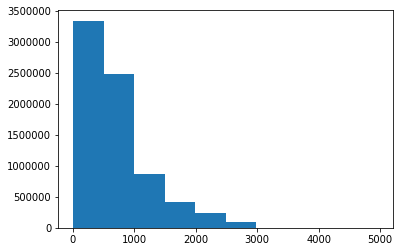

In [9]:
plt.hist(Flights.Distance)

In [10]:
# Number of flights from each airport: 
# Not actually degree, since it counts the same link many times. 
degree_tab = pd.crosstab(index = Flights["Origin"], columns = "count")

In [11]:
# Share of flights:
degree_tab["fraction"] = degree_tab["count"]/Flights.shape[0]
degree_tab.head()

col_0,count,fraction
Origin,,
ABE,5701,0.000765
ABI,2836,0.000381
ABQ,41161,0.005523
ABY,1312,0.000176
ACK,314,0.000042


(array([256.,  21.,  10.,   8.,   3.,   3.,   0.,   1.,   0.,   2.]),
 array([1.00000e+00, 4.13860e+04, 8.27710e+04, 1.24156e+05, 1.65541e+05,
        2.06926e+05, 2.48311e+05, 2.89696e+05, 3.31081e+05, 3.72466e+05,
        4.13851e+05]),
 <a list of 10 Patch objects>)

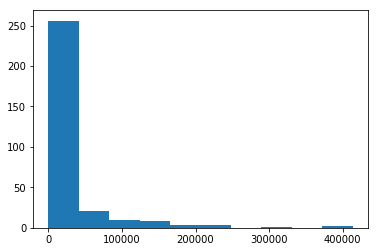

In [12]:
plt.hist(degree_tab["count"])

### US Airports

In [13]:
print(Airports.shape)
print(Airports.iata.nunique())
Airports.head()

(7543, 12)


AttributeError: 'GeoDataFrame' object has no attribute 'iata'

In [19]:
# create geopandas dataframe
Airports["Coordinates"] = list(zip(Airports.long, Airports.lat))
Airports.Coordinates = Airports.Coordinates.apply(Point)
Airports_gdf = gpd.GeoDataFrame(Airports, geometry = "Coordinates")
Airports_gdf.crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

# Create indicator for whether airport is in Flights dataset (as origin airport)
Airports_gdf["iata"] = Airports_gdf["iata"].astype(str)
Flights['Origin'] = Flights['Origin'].astype(str)
Airports_gdf["Connected"] = Airports_gdf.iata.isin(list(Flights.Origin))

# Check that 304 of the airports are
Airports_gdf.Connected.sum()

# Import US map and create a reduced version that excludes Hawaii and Alaska
US_states = gpd.read_file("states.shp") # from https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5
US_reduced = US_states.loc[(US_states.STATE_NAME != "Hawaii") & (US_states.STATE_NAME != "Alaska")]

# Create a reduced version of the Airports dataset without airports in the removed states and only with connected airports
Airports_reduced = Airports_gdf.loc[(Airports_gdf.state != "AK") & (Airports_gdf.state != "HI") & (Airports_gdf.state != "PR") & (Airports_gdf.Connected == 1)]

AttributeError: 'GeoDataFrame' object has no attribute 'long'

NameError: name 'US_reduced' is not defined

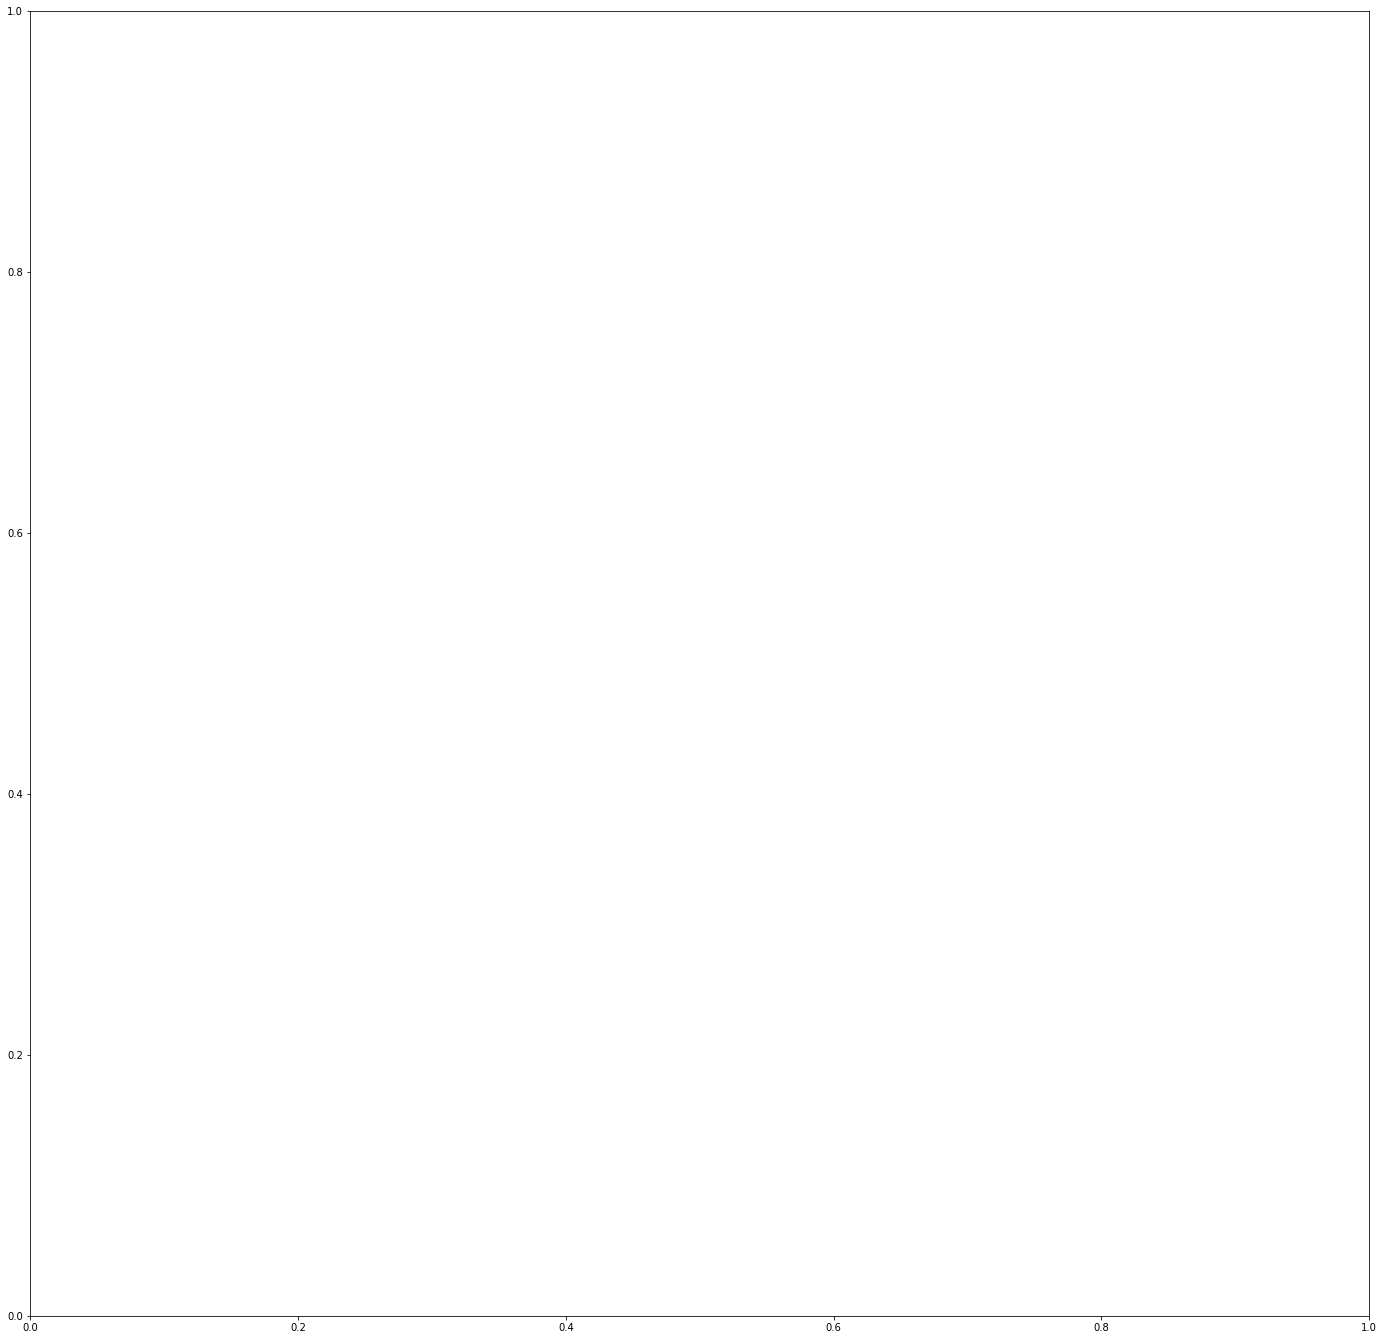

In [20]:
# Create figure using the reduced datasets
fig, ax = plt.subplots(figsize = (24,24))
US_reduced.plot(ax = ax, color = "green", edgecolor = "black")
Airports_reduced.plot(ax = ax, color = "red", markersize = 15)
#ax.set_facecolor("lightblue")
plt.xticks([])
plt.yticks([])
plt.savefig(fname = "Airports_USMap.pdf", format = "pdf")
plt.show()

In [27]:
scrape_data = Flights.drop_duplicates(subset = "Journey", keep = "first")

In [28]:
scrape_data.to_pickle("scrape_data.pkl")

In [30]:
scrape_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,Journey
0,2007,1,1,1,1232.0,WN,SMF,ONT,389,SMFONT
1,2007,1,1,1,1918.0,WN,SMF,PDX,479,SMFPDX
6,2007,1,1,1,1936.0,WN,SMF,PHX,647,SMFPHX
12,2007,1,1,1,2128.0,WN,SMF,SAN,480,SMFSAN
25,2007,1,1,1,2119.0,WN,SMF,SEA,605,SMFSEA


In [ ]:
# To create a network to be read into networkx, we need a dataset with all airports and their locations (as points), and all 
# connections as lines. 
# We have all airports and their locations. The connections are found by first choosing unique flights (in a specific month):
edges = copy.deepcopy(Flights.loc[(Flights.Month == 1) & (Flights.DayofMonth == 1)])
edges.drop_duplicates(subset = "Journey", keep = "first", inplace = True)

# Then, get coordinates for origin and destination airports from the airports dataset.


In [ ]:
Airports.columns

In [ ]:
edges = pd.merge(edges, Airports[['iata','Coordinates']], how='left', left_on = "Origin", right_on = "iata")
edges = pd.merge(edges, Airports[['iata','Coordinates']], how='left', left_on = "Dest", right_on = "iata")

In [ ]:
edges.drop(["iata_x","iata_y"], inplace = True, axis = 1)

In [ ]:
edges.head()